The correct initial condition for y2 is: 0.9418597880443724


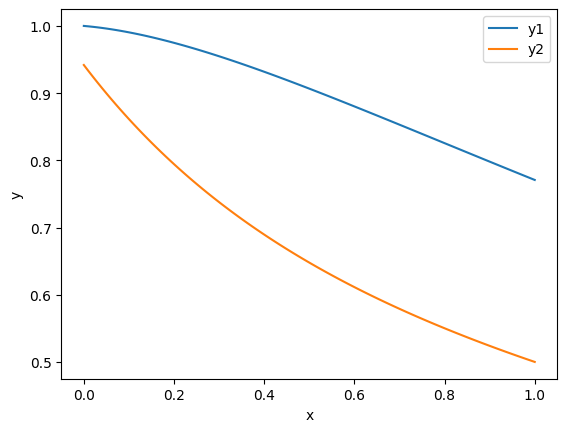

In [8]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import root_scalar

# Define the system of differential equations
def equations(y, x):
    y1, y2 = y
    dy1dx = -y1 + y2
    dy2dx = y1 - 2*y2
    return [dy1dx, dy2dx]

# Define the initial condition for y1
y10 = 1.0

# Define the terminal condition for y2
y20 = 0.5

# Define the interval of integration
x = np.linspace(0, 1, 100)

# Define the function to integrate the system of differential equations
def integrate(y20_guess):
    y0 = [y10, y20_guess]
    sol = odeint(equations, y0, x)
    return sol[:, 1][-1] - y20

# Use the root_scalar function to find the correct initial condition for y2
sol = root_scalar(integrate, bracket=[-10, 10], method='brentq')

# Print the solution
print("The correct initial condition for y2 is:", sol.root)

# Integrate the system of differential equations with the correct initial condition
y0 = [y10, sol.root]
sol = odeint(equations, y0, x)

# Plot the solution
import matplotlib.pyplot as plt
plt.plot(x, sol[:, 0], label='y1')
plt.plot(x, sol[:, 1], label='y2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()